In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

I selected this dataset https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008 due to the widespread and crucial nature of diabetes as a health condition. Investigating the factors influencing hospitalizations related to diabetes can offer valuable insights into healthcare management and outcomes. My aim is to analyze patterns, relationships, and potential predictors of hospital readmissions for individuals with diabetes.

Based on the data at hand, I would like to propose the following hypotheses:

1. Individuals with higher adherence to medication are less prone to readmission.
Expected Outcome: Improved medication adherence could potentially lead to better health outcomes, thereby reducing the probability of hospital readmissions.
2. Patients with a greater number of inpatient visits are more susceptible to readmission.
Expected Outcome: A higher frequency of inpatient visits might indicate a more complex health condition, consequently increasing the risk of readmission.
3. The likelihood of readmission is higher for younger patients.
Expected Outcome: Younger patients may have fewer underlying health issues, which could decrease the probability of readmission.

In [ ]:
# Load Diabetes Data
df = pd.read_csv("/content/diabetic_data.csv")

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.shape

(101766, 50)

In [ ]:
#Looking more into the data and identifying any empty columns/rows, the type of data we are dealing with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
#Getting a summary statistics of our data
summary_statistics = df.describe()
print(summary_statistics)

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [ ]:
#I see there are a lot of fields with "?". Lets replace those with NaN values.
df = df.replace("?",np.nan)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#Handling the missing values by cleaning the dataset
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
diabetic_data = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1) #dropping these columns as the amount of the missing values is significant and won't be needed
#in the research I will be making.

In [ ]:
# Drop rows with null values
diabetic_data = diabetic_data.dropna()

# Display the updated DataFrame
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [ ]:
#Count of null values after dropping null values
diabetic_data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [ ]:
#Dataset count row-wise for each column after removing null values
diabetic_data.count()

encounter_id                98053
patient_nbr                 98053
race                        98053
gender                      98053
age                         98053
admission_type_id           98053
discharge_disposition_id    98053
admission_source_id         98053
time_in_hospital            98053
num_lab_procedures          98053
num_procedures              98053
num_medications             98053
number_outpatient           98053
number_emergency            98053
number_inpatient            98053
diag_1                      98053
diag_2                      98053
diag_3                      98053
number_diagnoses            98053
max_glu_serum               98053
A1Cresult                   98053
metformin                   98053
repaglinide                 98053
nateglinide                 98053
chlorpropamide              98053
glimepiride                 98053
acetohexamide               98053
glipizide                   98053
glyburide                   98053
tolbutamide   

In [ ]:
# Let's sort by encounter_id

diabetic_data.sort_values("encounter_id", ascending=True).head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,28236,89869032,AfricanAmerican,Female,[40-50),1,1,7,9,47,...,No,Steady,No,No,No,No,No,No,Yes,>30
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [ ]:
#Double checking the number of columns I have after data cleaning
diabetic_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
#Looking at the correlation between columns
diabetic_data.corr()

<ipython-input-22-66c35126c768>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diabetic_data.corr()


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512411,-0.157664,-0.136791,-0.115227,-0.068651,-0.029506,-0.016994,0.067610,0.102921,0.082751,0.028098,0.254971
patient_nbr,0.512411,1.000000,-0.013327,-0.143046,-0.035921,-0.029932,0.013413,-0.022269,0.010350,0.101727,0.060407,0.009585,0.214283
admission_type_id,-0.157664,-0.013327,1.000000,0.079878,0.109265,-0.012209,-0.141212,0.129468,0.080273,0.026126,-0.019799,-0.037119,-0.122603
discharge_disposition_id,-0.136791,-0.143046,0.079878,1.000000,0.016532,0.162907,0.022610,0.013867,0.106692,-0.010277,-0.025988,0.019039,0.038427
admission_source_id,-0.115227,-0.035921,0.109265,0.016532,1.000000,-0.007975,0.048061,-0.134676,-0.055741,0.025307,0.059001,0.035541,0.071770
time_in_hospital,-0.068651,-0.029932,-0.012209,0.162907,-0.007975,1.000000,0.318647,0.191133,0.464199,-0.010910,-0.010506,0.072288,0.211242
num_lab_procedures,-0.029506,0.013413,-0.141212,0.022610,0.048061,0.318647,1.000000,0.058665,0.267843,-0.008619,-0.002138,0.039207,0.150289
num_procedures,-0.016994,-0.022269,0.129468,0.013867,-0.134676,0.191133,0.058665,1.000000,0.382958,-0.026459,-0.038727,-0.067545,0.058929
num_medications,0.067610,0.010350,0.080273,0.106692,-0.055741,0.464199,0.267843,0.382958,1.000000,0.042650,0.012125,0.062901,0.241481
number_outpatient,0.102921,0.101727,0.026126,-0.010277,0.025307,-0.010910,-0.008619,-0.026459,0.042650,1.000000,0.091034,0.105980,0.091418


The focal point of this column is the "days to inpatient readmission" – our target feature. The categorization is as follows:

If a patient was readmitted in less than 30 days, it is denoted as "<30."
If the patient was readmitted in more than 30 days, it is represented as ">30."
In cases where there is no recorded readmission, it is labeled as "NO."
To simplify these values into two categories, we employed the following mapping rule:

"NO" is mapped to 0.
Both "<30" and ">30" are consolidated into 1.

0    52338
1    45715
Name: readmitted, dtype: int64


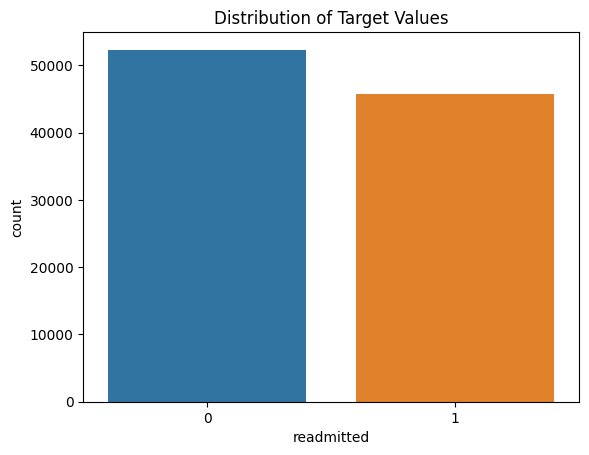

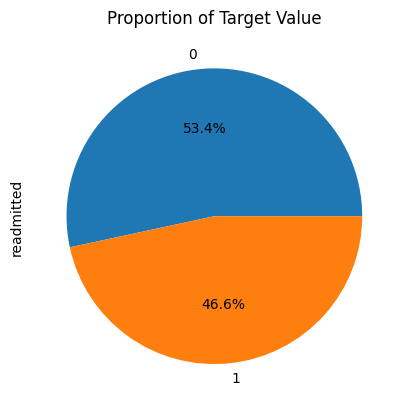

In [ ]:
diabetic_data = diabetic_data.replace({"NO":0,
                         "<30":1,
                         ">30":1})

print(diabetic_data.readmitted.value_counts())

sns.countplot(x = "readmitted", data = diabetic_data)
plt.title("Distribution of Target Values")
plt.show()

# Pie chart
diabetic_data.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

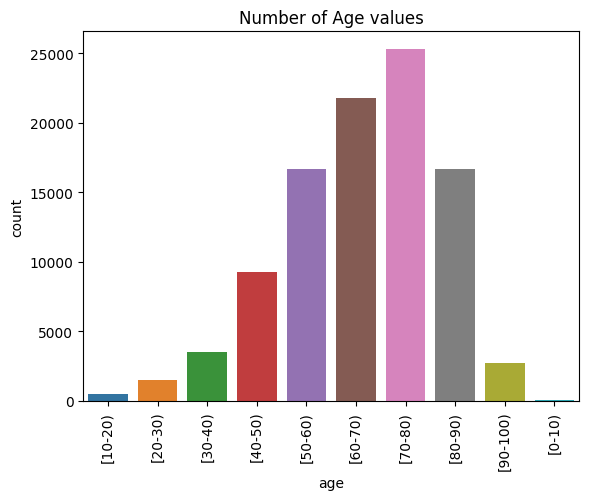

Proportion of Age
[70-80)     25.808491
[60-70)     22.242053
[80-90)     17.033645
[50-60)     17.028546
[40-50)      9.448971
[30-40)      3.618451
[90-100)     2.770950
[20-30)      1.507348
[10-20)      0.475253
[0-10)       0.066291
Name: age, dtype: float64


In [ ]:
# Creating a plot based on race
sns.countplot(x=diabetic_data.age, data = diabetic_data)
plt.xticks(rotation=90)
plt.title("Number of Age values")
plt.show()

print("Proportion of Age")
print(diabetic_data.age.value_counts(normalize = True)*100)


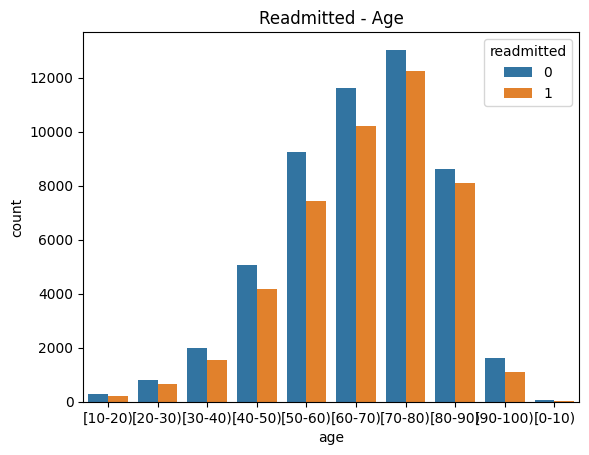

In [ ]:
#Based on Race, how does the data play in porpotion of readmission?
sns.countplot(x="age", hue= "readmitted", data = diabetic_data)
plt.title("Readmitted - Age")
plt.show()

Based on the graph above Younger patients are more likely to be readmitted.

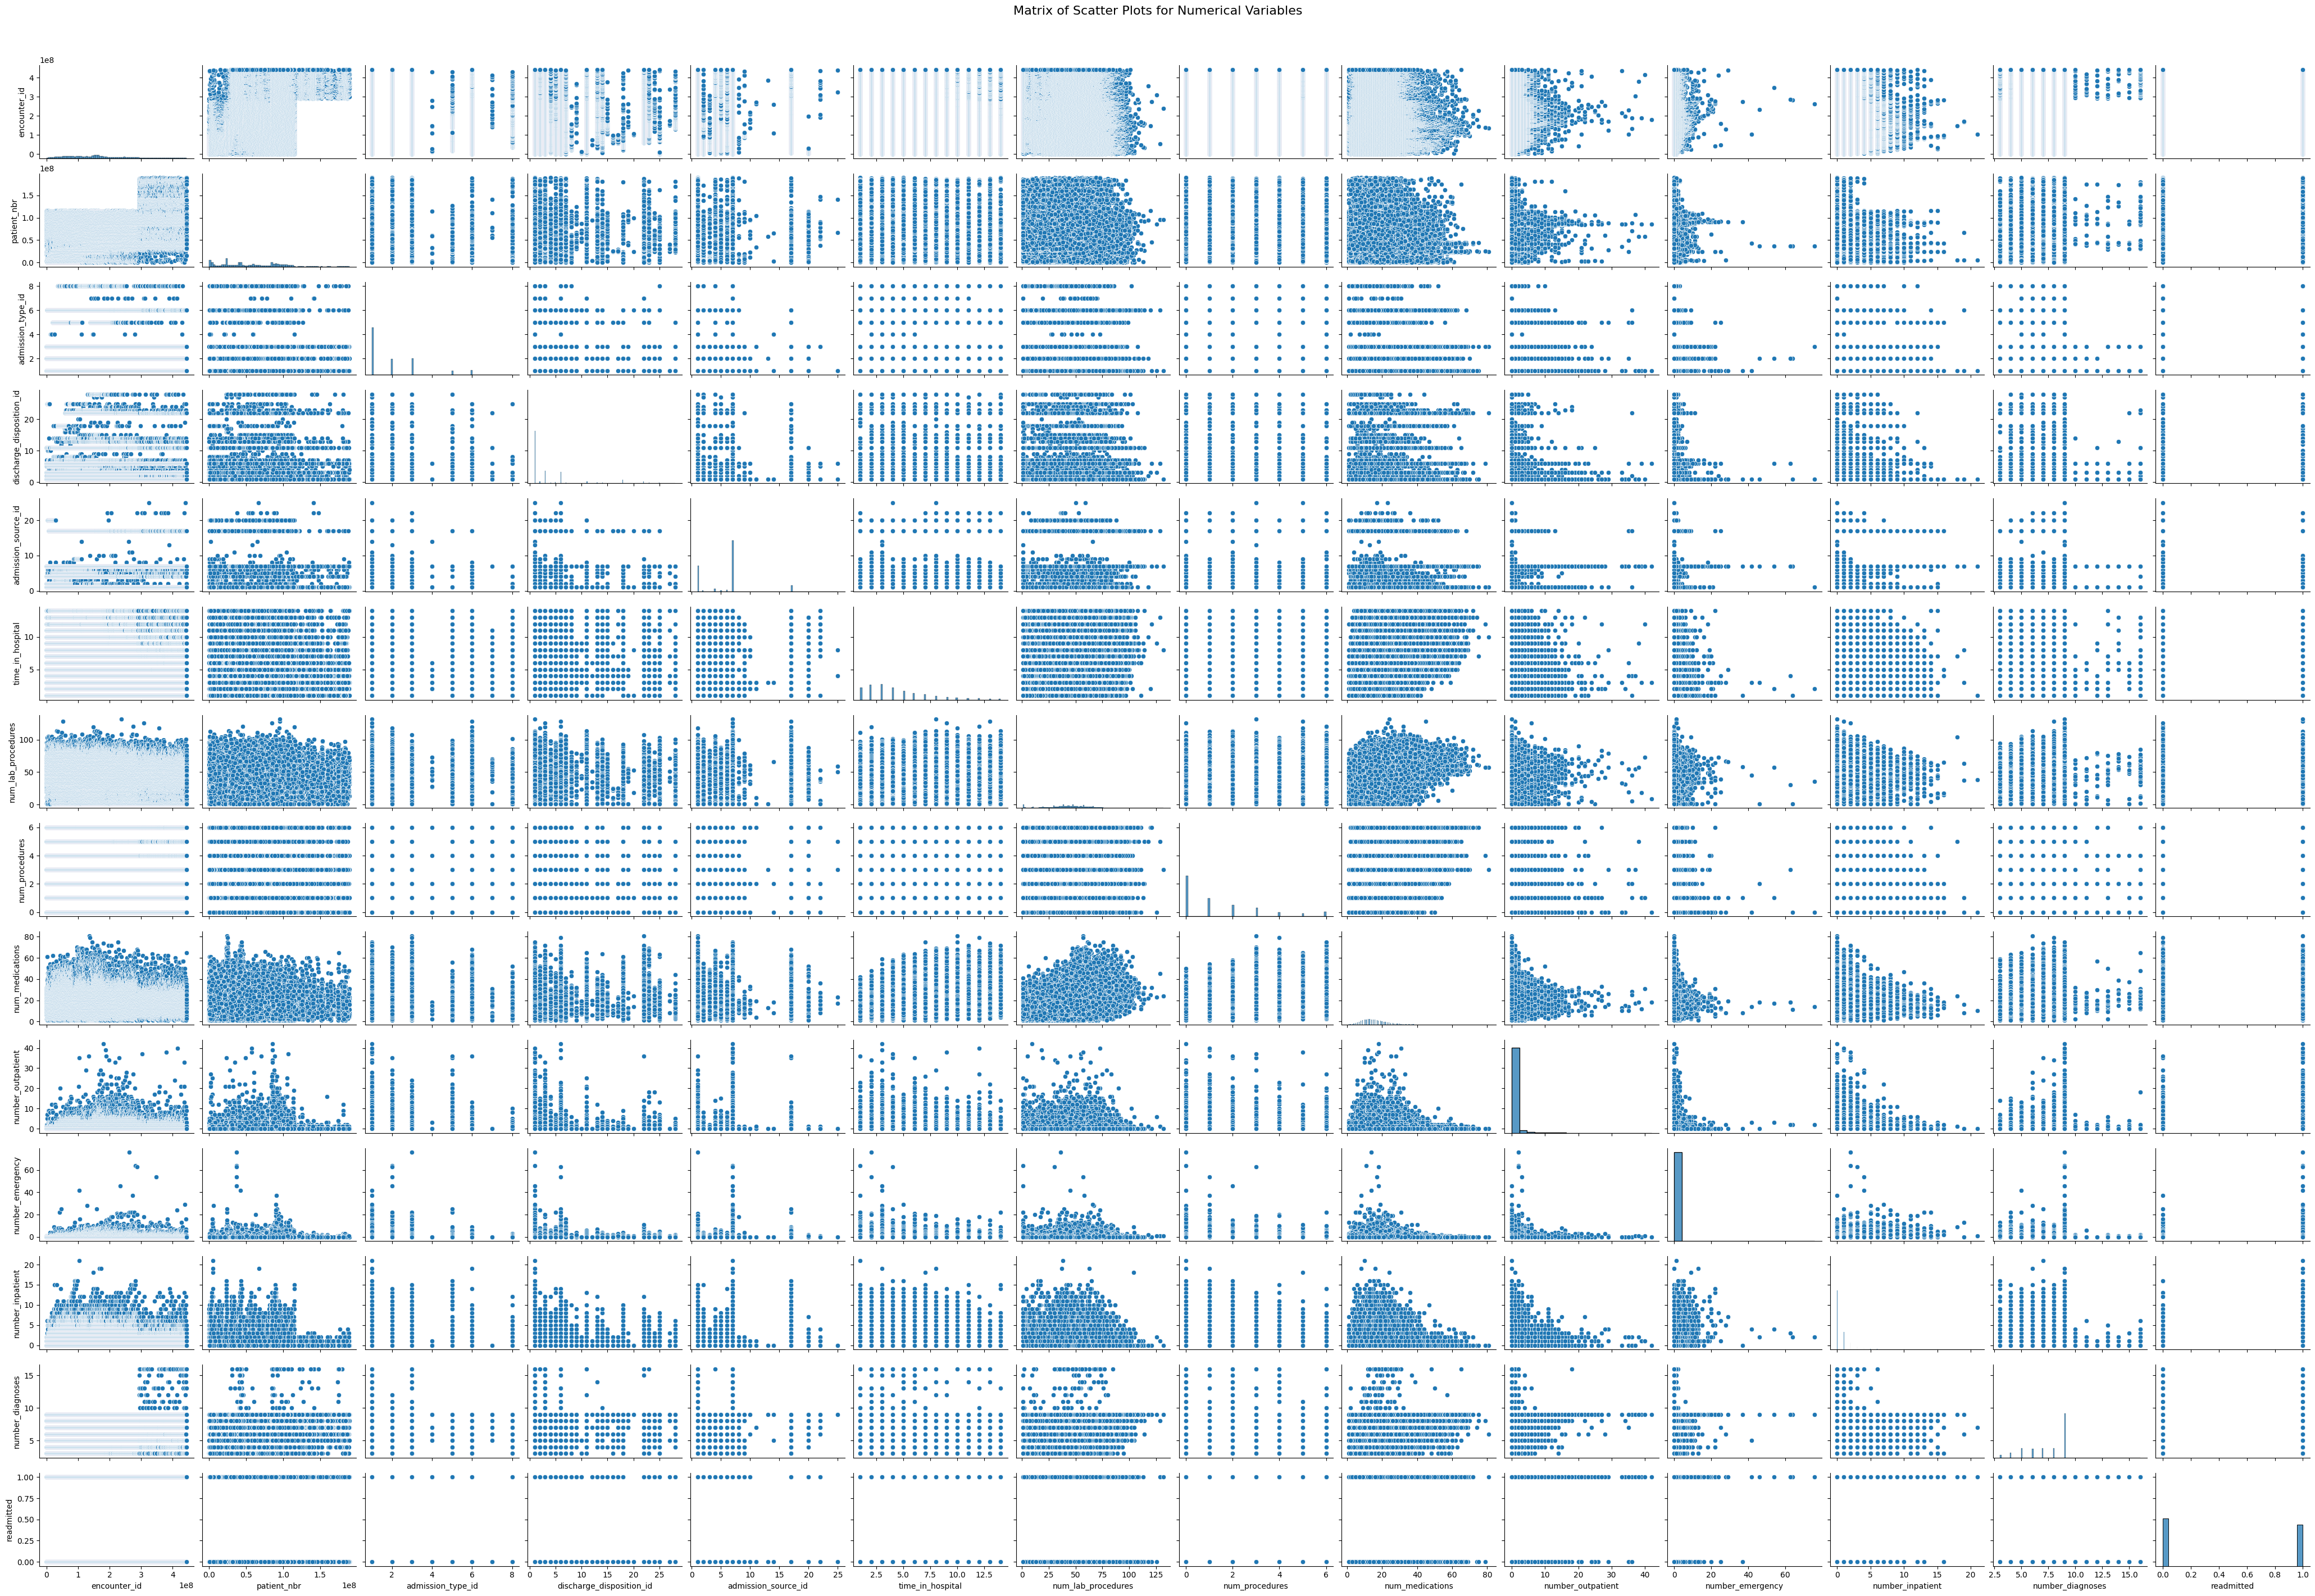

In [ ]:
# Matrix of scatter plots for numerical variables
sns.pairplot(diabetic_data, height=2, aspect=1.5)
plt.suptitle('Matrix of Scatter Plots for Numerical Variables', y=1.02, fontsize=16)
plt.show()

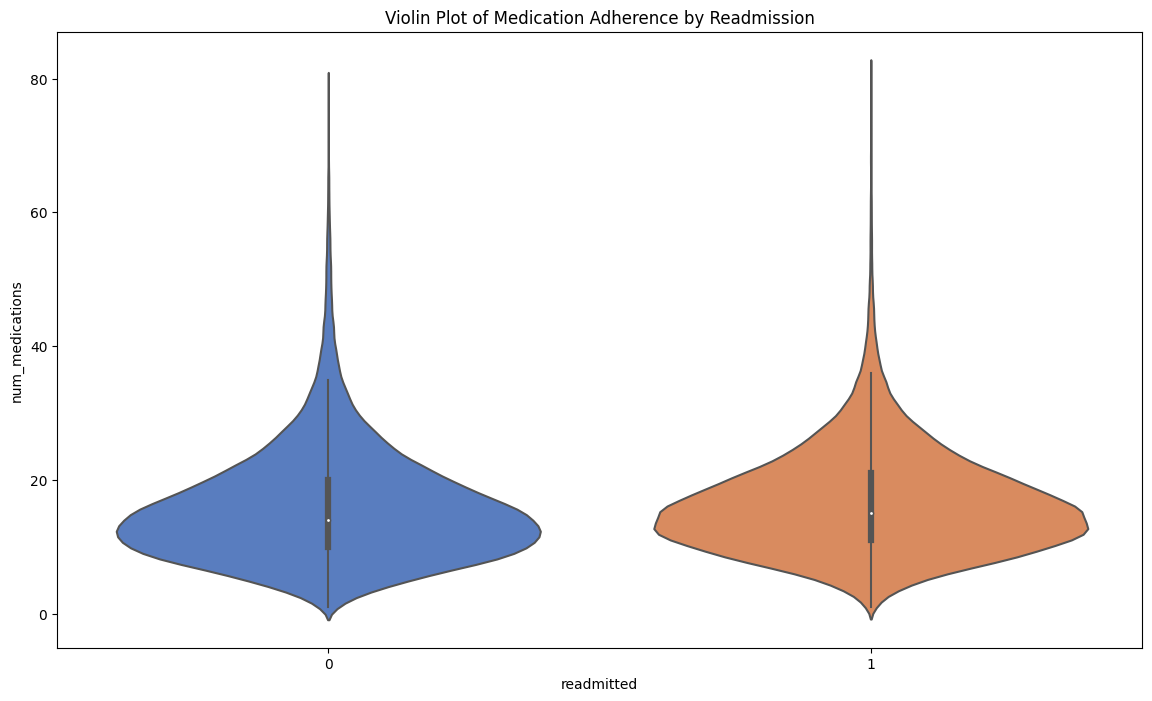

In [ ]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='readmitted', y='num_medications', data=diabetic_data, palette='muted')
plt.title('Violin Plot of Medication Adherence by Readmission')
plt.show()

<ipython-input-28-d83babf58312>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diabetic_data.corr()


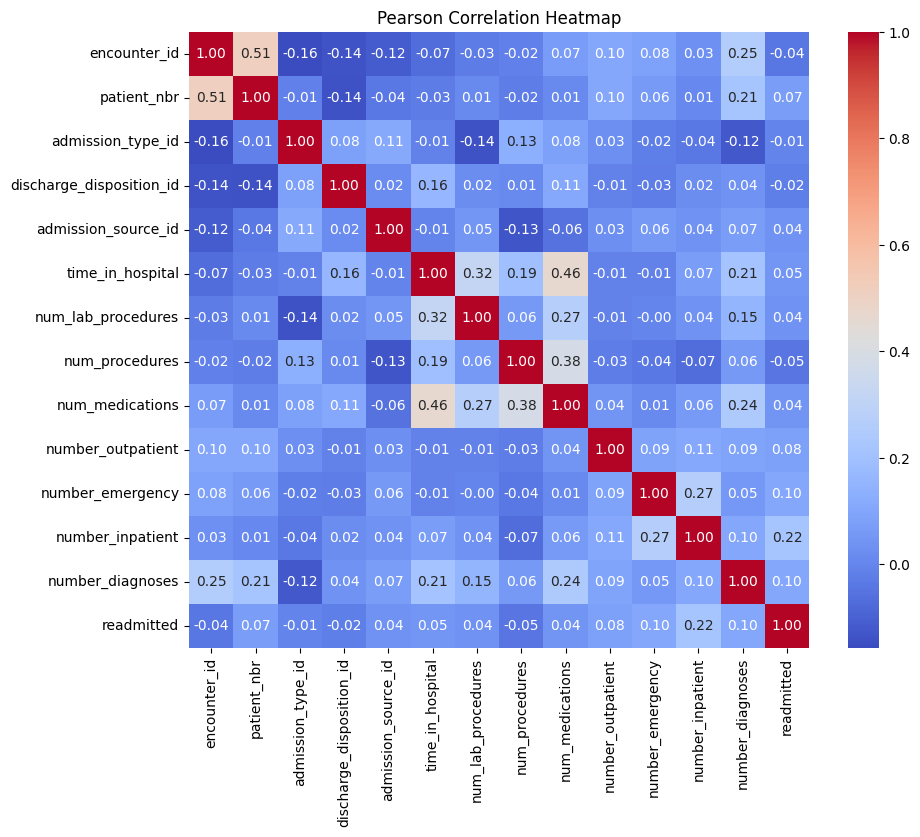

In [ ]:
correlation_matrix = diabetic_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

Insights drawn from scatter plots and correlations indicate potential relationships among medication adherence, the number of medications, age, and hospital readmission.
Key Predictors: Medication adherence, the number of medications, and age emerge as significant factors that could influence the likelihood of hospital readmission.

There is a positive correlation between lower medication adherence, a higher count of medications, and younger age with hospital readmission. While younger patients may have fewer concurrent health issues, factors like lifestyle choices or non-compliance with treatment plans could contribute to their readmission.

In [ ]:
cat_data = diabetic_data.select_dtypes('O')
num_data = diabetic_data.select_dtypes(np.number)

cat_data

,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
1,Caucasian,Female,[10-20),276,250.01,255,None,None,No,No,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),648,250,V27,None,None,No,No,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),8,250.43,403,None,None,No,No,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),197,157,250,None,None,No,No,...,No,No,Steady,No,No,No,No,No,Ch,Yes
5,Caucasian,Male,[50-60),414,411,250,None,None,No,No,...,No,No,Steady,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),250.13,291,458,None,>8,Steady,No,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),560,276,787,None,None,No,No,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),38,590,296,None,None,Steady,No,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),996,285,998,None,None,No,No,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [ ]:
# Label Encoding for categorical features
LE = LabelEncoder()

for i in cat_data:
  cat_data[i] = LE.fit_transform(cat_data[i])

In [ ]:
# Concatenating numerical and categorical data

data = pd.concat([num_data,cat_data],axis=1)
data.head()
data['glipizide'].unique()

array([1, 2, 3, 0])

In [ ]:
data.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)
data.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
1,1,1,7,3,59,0,18,0,0,0,...,0,0,3,1,0,0,0,0,0,1
2,1,1,7,2,11,5,13,2,0,1,...,0,0,1,1,0,0,0,0,1,1
3,1,1,7,2,44,1,16,0,0,0,...,0,0,3,1,0,0,0,0,0,1
4,1,1,7,1,51,0,8,0,0,0,...,0,0,2,1,0,0,0,0,0,1
5,2,1,2,3,31,6,16,0,0,0,...,0,0,2,1,0,0,0,0,1,1


In [ ]:
# Splitting data into features (X) and target variable (y)

X = data.drop('readmitted',axis=1)

y = data['readmitted']

In [ ]:
# Train-test split and Standard Scaling

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#x_train: the part of x used to fit the model
#x_test: the part of x used to evaluate the model
#y_train: the part of y that corresponds to x_train
#y_test: the part of y that corresponds to x_test
#Once your data is split, you can forget about x_test and y_test until you define your model.

In [ ]:
#Scale data: Standarization is the process of transforming data in a way such that the mean of each column becomes equal to 0 and the standard deviation of each columns is 1.
#1. Calculate the mean and standard deviation in each column
#2. Substract the corresponding mean from each element
#3. Divide the obtained difference by the corresponding standard deviation
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)

X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
#Starting with Logistic Regression. Create the mode land train it

LR = LogisticRegression()

LR.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
LR.score(X_train_scaled,y_train)


0.615932791106805

In [ ]:
LR.score(X_test_scaled,y_test)

0.6146040487481516

In [ ]:
#Random Forest

RF = RandomForestClassifier()

RF.fit(X_train_scaled,y_train)

RF.score(X_train_scaled,y_train)

In [ ]:
RF.score(X_test_scaled,y_test)

In [ ]:
# Model evaluation
print("Logistic Regression:")
print(f"Train Score: {LR.score(X_train_scaled, y_train)}")
print(f"Test Score: {LR.score(X_test_scaled, y_test)}")

print("\nRandom Forest:")
print(f"Train Score: {RF.score(X_train_scaled, y_train)}")
print(f"Test Score: {RF.score(X_test_scaled, y_test)}")

In [ ]:
# Confusion matrix for Random Forest

y_pred = RF.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

0.5599918413135485

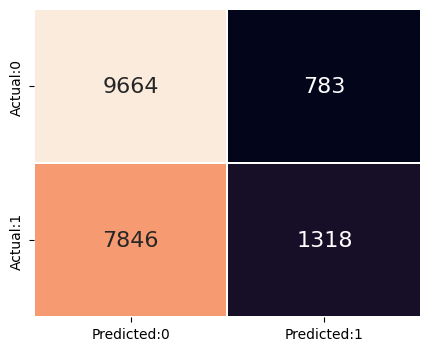

In [ ]:
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', color='red', cbar = False,
                linewidths = 0.1, annot_kws = {'size':16})

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)

# Random Forest
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
# Predict probabilities for each class for Logistic Regression
y_prob_lr = LR.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

In [ ]:
# Predict probabilities for each class for Random Forest
y_prob_rf = RF.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

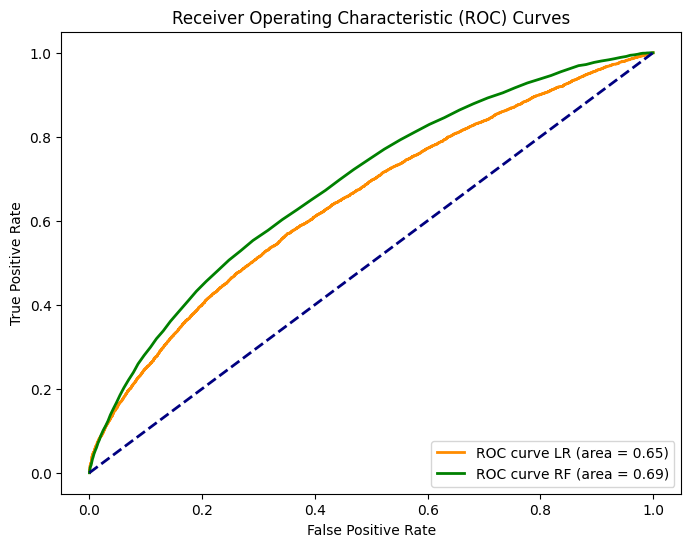

In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve LR (area = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC curve RF (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

This analysis explored various aspects of the dataset, including model performance, feature importance, and the impact of feature selection. The models achieved varying levels of accuracy, and further investigation was conducted by filtering out the weakest features and using only the strongest features ('readmitted' and 'num_medications'). The heatmap of probability for the Random Forest model provided insights into the model's confidence across different feature values. Interpretation of evaluation metrics and consideration of feature importance can guide future steps in refining the models or understanding the underlying patterns in the data."
From the graph we can see that LR - Linear Regression model is a little bit better model than Random Forest, but it does not differ by much.